In [1]:
# suppress display of warnings
import warnings
warnings.filterwarnings("ignore")

import pandas as pd 
import numpy as np

# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')
df.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

In [4]:
df["case_id"].unique()

array([     1,      2,      3, ..., 318436, 318437, 318438], dtype=int64)

In [5]:
nullobject = []
for i in df:
    if (df[i].isna().sum() > 0):
        nullobject.append(i)

nullobject

['Bed Grade', 'City_Code_Patient']

In [6]:
for col in nullobject:
    mode_value = df[col].mode()[0]
    df[col].fillna(mode_value, inplace=True)
    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade                          318438 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3184

In [7]:
df.drop('case_id',axis = 1)

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,6,a,6,X,3,radiotherapy,Q,F,4.0,86499,23.0,Emergency,Moderate,3,41-50,4144.0,11-20
318434,24,a,1,X,2,anesthesia,Q,E,4.0,325,8.0,Urgent,Moderate,4,81-90,6699.0,31-40
318435,7,a,4,X,3,gynecology,R,F,4.0,125235,10.0,Emergency,Minor,3,71-80,4235.0,11-20
318436,11,b,2,Y,3,anesthesia,Q,D,3.0,91081,8.0,Trauma,Minor,5,11-20,3761.0,11-20


In [8]:
df.Stay.value_counts()

21-30                 87491
11-20                 78139
31-40                 55159
51-60                 35018
0-10                  23604
41-50                 11743
71-80                 10254
More than 100 Days     6683
81-90                  4838
91-100                 2765
61-70                  2744
Name: Stay, dtype: int64

In [9]:
df.corr()

,case_id,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Visitors with Patient,Admission_Deposit
case_id,1.000000,-0.043023,-0.011352,0.042580,0.013714,-0.004150,0.065207,0.001309,-0.045972
Hospital_code,-0.043023,1.000000,0.128294,-0.059638,-0.013374,0.002291,-0.015477,-0.028500,0.045446
City_Code_Hospital,-0.011352,0.128294,1.000000,-0.045771,-0.049400,0.000750,-0.024161,0.018184,-0.034455
Available Extra Rooms in Hospital,0.042580,-0.059638,-0.045771,1.000000,-0.115913,0.000921,-0.009462,0.096714,-0.143739
Bed Grade,0.013714,-0.013374,-0.049400,-0.115913,1.000000,0.001656,-0.007439,0.088950,0.073889
patientid,-0.004150,0.002291,0.000750,0.000921,0.001656,1.000000,0.002009,0.006889,-0.000877
City_Code_Patient,0.065207,-0.015477,-0.024161,-0.009462,-0.007439,0.002009,1.000000,-0.011677,0.025485
Visitors with Patient,0.001309,-0.028500,0.018184,0.096714,0.088950,0.006889,-0.011677,1.000000,-0.150358
Admission_Deposit,-0.045972,0.045446,-0.034455,-0.143739,0.073889,-0.000877,0.025485,-0.150358,1.000000


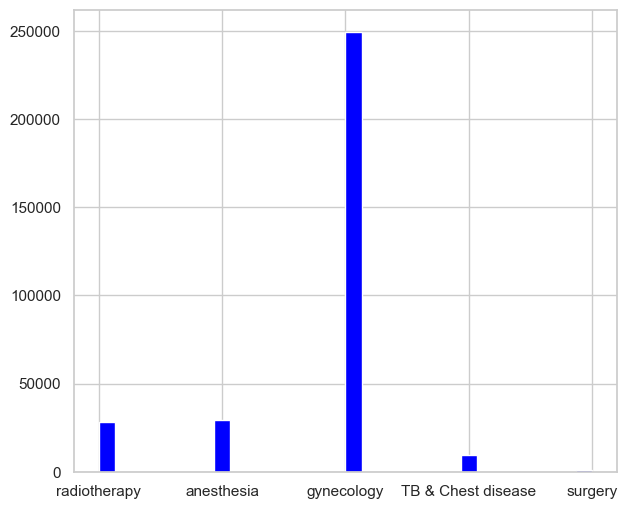

In [10]:
plt.figure(figsize=(7, 6))
sns.set(style="whitegrid")
plt.hist(df['Department'], bins=30, color='blue')

plt.show()

* "Insights from the histogram reveal that the Gynecology department stands out with the highest influx of patient admissions, suggesting a notable demand for gynecological services. Following Gynecology, the Anesthesia and Radiotherapy departments also demonstrate substantial admission rates, emphasizing the critical role these departments play in providing essential medical care within the hospital.

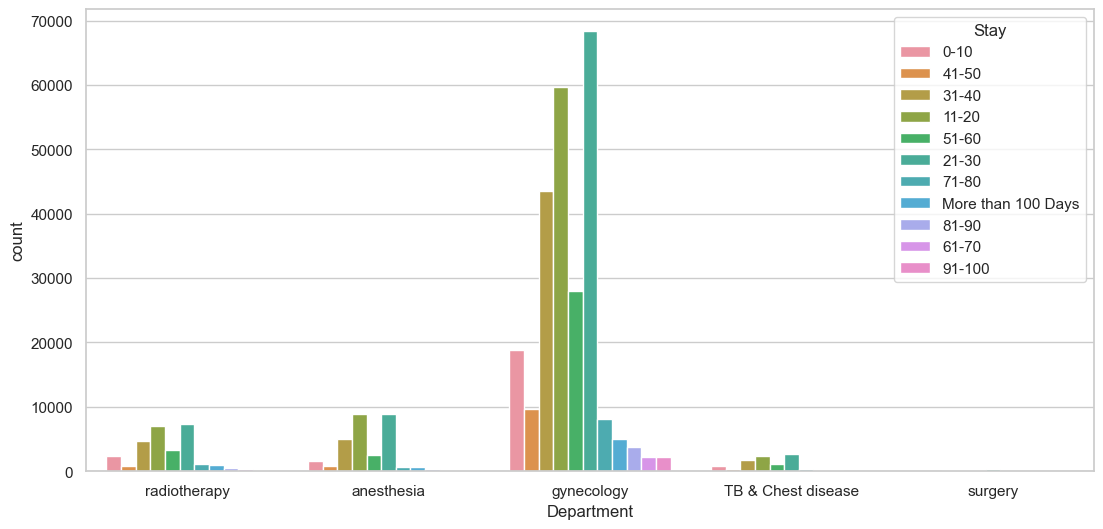

In [11]:
plt.figure(figsize=(13, 6))
sns.set(style="whitegrid")
sns.countplot(x=df['Department'], hue=df['Stay'], data=df)

plt.show()

* Analysis of the graph highlights the Gyne Department as the primary contributor to the hospital's maximum duration of stay, particularly emphasizing a significant concentration of stays ranging between 21 to 30 days. This finding underscores the critical role of the Gyne Department in providing extensive medical care and attention to patients requiring longer durations of hospitalization.

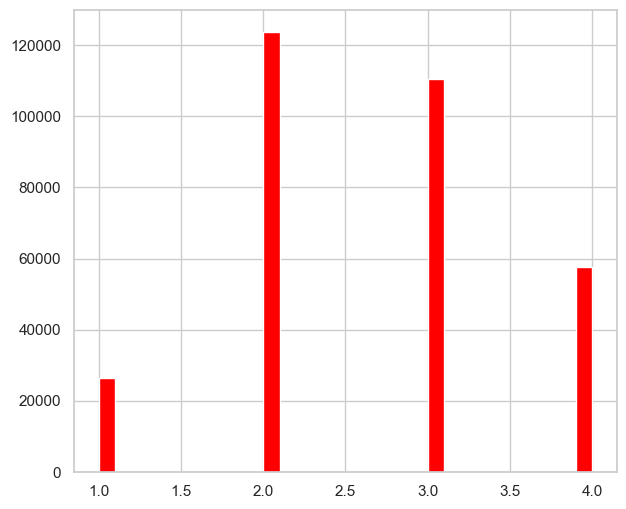

In [12]:
plt.figure(figsize=(7, 6))
sns.set(style="whitegrid")
plt.hist(df['Bed Grade'], bins=30, color='red')

plt.show()

* Among all the beds available in the hospital, the 2.0 bed grade exhibits the highest count, exceeding 120,000. It is followed by bed grades 3.0, 4.0, and 1.0, indicating varying levels of occupancy across different bed categories

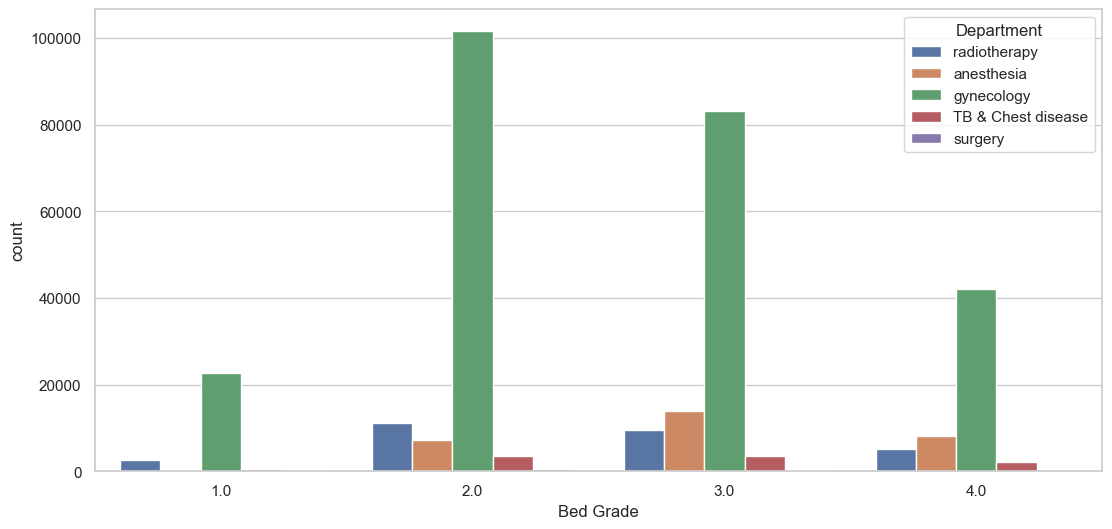

In [13]:
plt.figure(figsize=(13, 6))
sns.set(style="whitegrid")
sns.countplot(x=df['Bed Grade'], hue=df['Department'], data=df)

plt.show()

* Analysis reveals that the Gyne department has the highest occupancy rate among all departments, irrespective of bed grade. Notably, the maximum count of Gyne occupants corresponds specifically to the 2.0 bed grade, emphasizing the pronounced demand for this particular level of accommodation within the department.

In [14]:
df.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


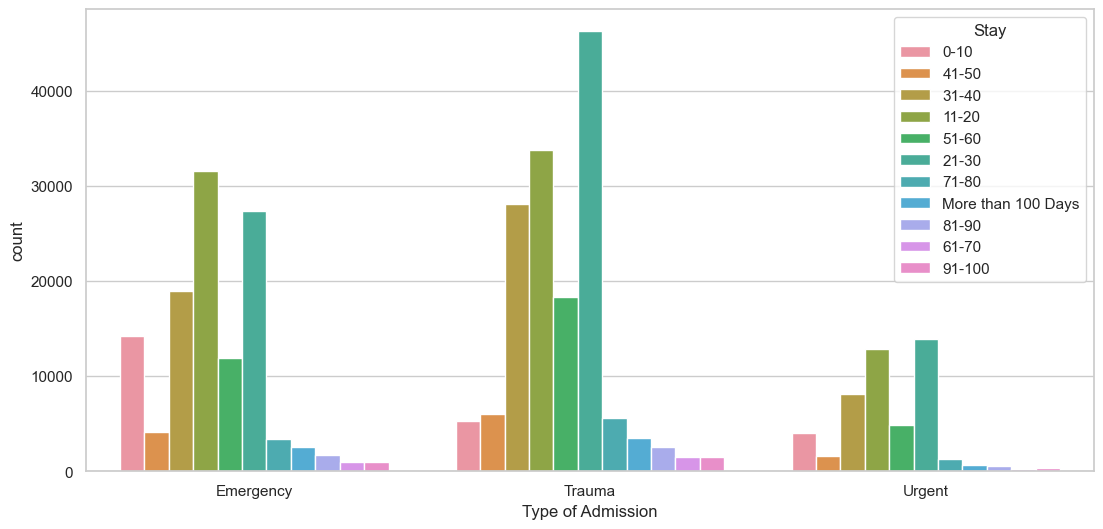

In [15]:
plt.figure(figsize=(13, 6))
sns.set(style="whitegrid")
sns.countplot(x=df['Type of Admission'], hue=df['Stay'], data=df)

plt.show()

* Analysis of the data highlights the dominance of the Trauma Admission category, indicating the highest influx of occupants compared to Emergency and Urgent Admissions. Notably, the Trauma Admissions also reveal a significant concentration of stays, particularly within the 21 to 30-day duration, underscoring the critical need for extended medical care and attention for patients admitted under the Trauma category.

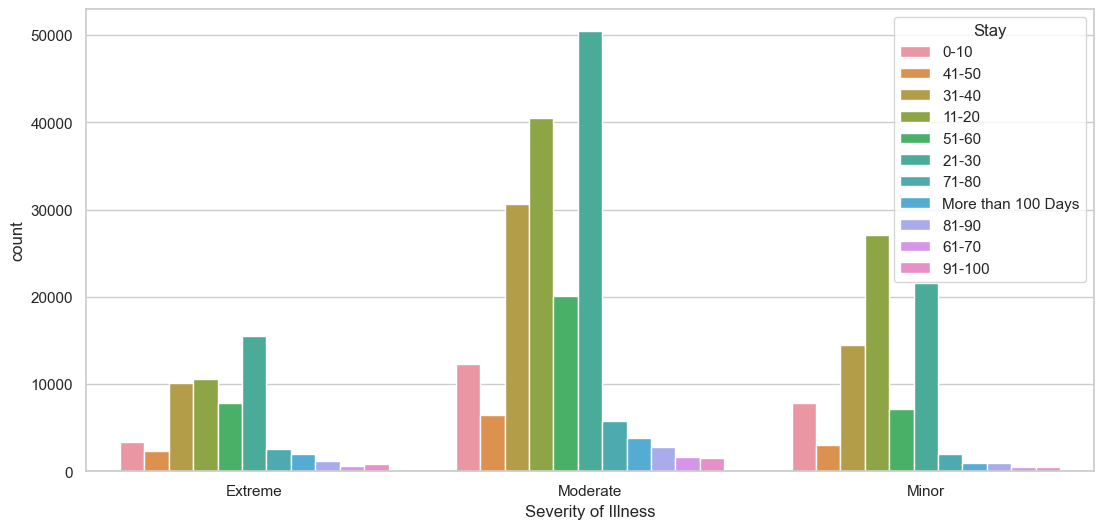

In [16]:


plt.figure(figsize=(13, 6))
sns.set(style="whitegrid")
sns.countplot(x=df['Severity of Illness'], hue=df['Stay'], data=df)

plt.show()

* Upon analysis, it becomes evident that the 'Moderate' level of severity garners the highest number of hospital admissions compared to the 'Extreme' and 'Minor' levels. Furthermore, the data highlights a significant concentration of patient stays within the 21 to 30-day range, emphasizing the prevalence of cases requiring comprehensive medical attention falling under the 'Moderate' severity category.

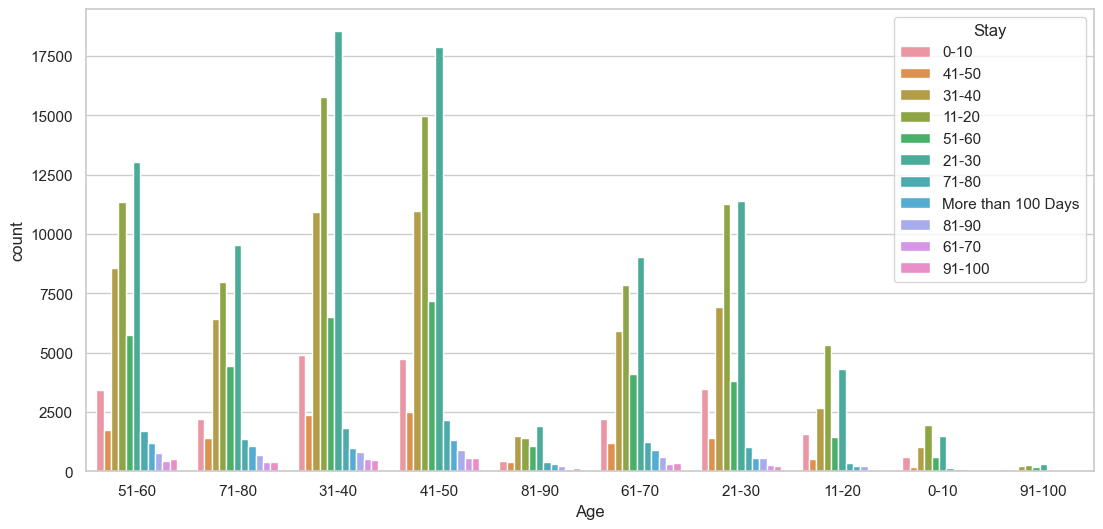

In [17]:
plt.figure(figsize=(13, 6))
sns.set(style="whitegrid")
sns.countplot(x=df['Age'], hue=df['Stay'], data=df)

plt.show()

* The graph provides valuable insights, indicating that the 31 to 40 age group represents the largest number of individuals admitted to the hospital. Furthermore, within this age group, a significant proportion of patients are observed to have extended stays ranging from 21 to 30 days, underscoring the need for in-depth medical attention and care for this particular demographic.

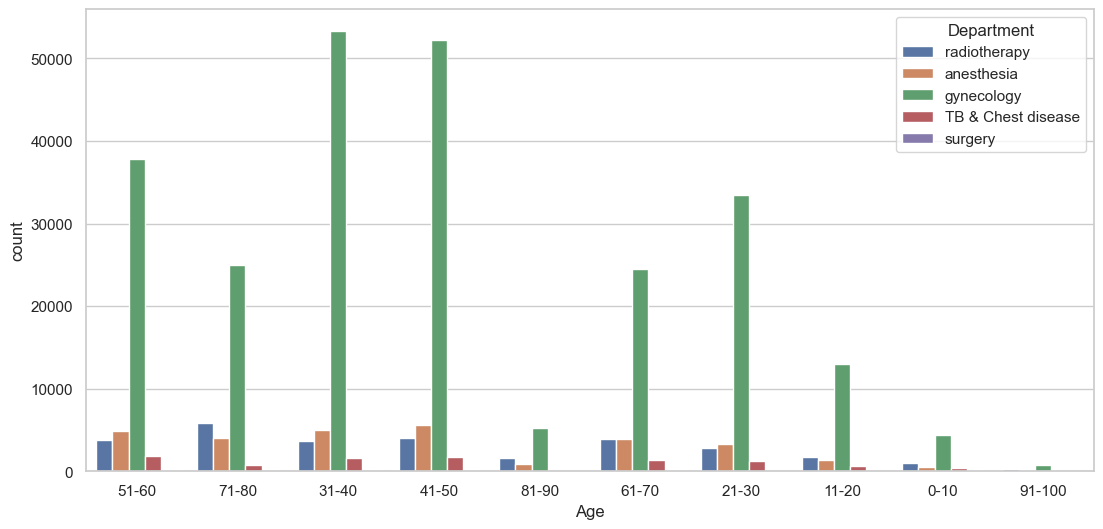

In [18]:
plt.figure(figsize=(13, 6))
sns.set(style="whitegrid")
sns.countplot(x=df['Age'], hue=df['Department'], data=df)

plt.show()

* Analysis indicates that the Gyne (Gynecology) department attracts the maximum number of visitors across all age groups. Notably, the age group of 31 to 40 exhibits a substantial influx, with the count surpassing 50,000 visits, emphasizing the significant demand for gynecological services within this particular age demographic.

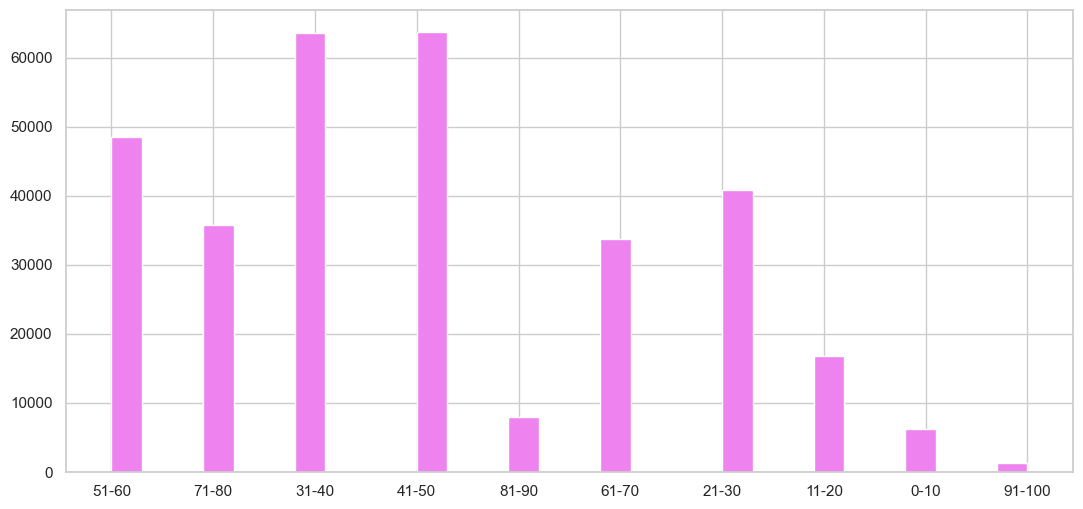

In [19]:
plt.figure(figsize=(13, 6))
plt.hist(df['Age'], bins=30, color='violet')
plt.show()

* According to the graph, the age groups 31 to 40 and 41 to 50 demonstrate the highest rate of hospital visits and stays, suggesting a significant influx of patients within these age brackets.

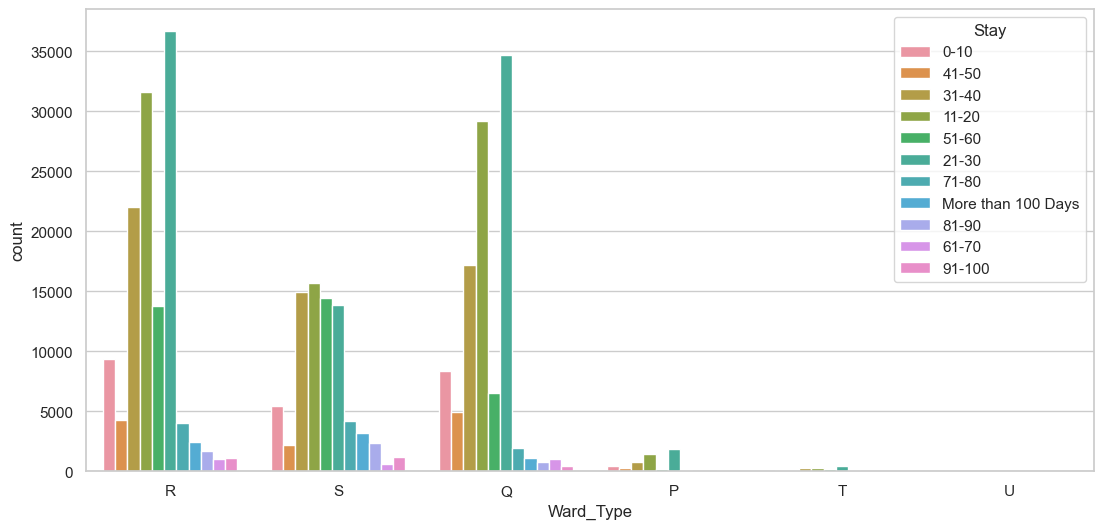

In [20]:
plt.figure(figsize=(13, 6))
sns.set(style="whitegrid")
sns.countplot(x=df['Ward_Type'], hue=df['Stay'], data=df)

plt.show()

* The analysis reveals significant occupancy in wards R, S, and Q, while wards T and U show minimal occupancy rates. Notably, the R ward accommodates the highest number of patients in the 21 to 30 age group, indicating a substantial demand for medical services among young adults in this unit

* **Key Factors Affecting Patient Stay**: Based on the analysis of the provided data, it is evident that several key features significantly influence the duration of a patient's stay in the hospital. These features include the department of admission (Dept), bed grade, type of admission, severity of illness, patient age, and ward type.
<br><br>

* **Patient Demographics**: The analysis reveals that the highest number of hospital visits and admissions corresponds to the age group of 21 to 30 years. This finding underscores the significance of catering to the healthcare needs of the young adult population.
<br><br>

* **Department with Highest Patient Volume**: The Gyne (Gynecology) department stands out as the department with the highest patient influx. Understanding and addressing the specific requirements and challenges associated with this department could be crucial for efficient hospital management and resource allocation.

In [21]:
objecttype = []

for i in df:
    if(df[i].dtype == "object"):
        objecttype.append(i)

In [22]:
objecttype

['Hospital_type_code',
 'Hospital_region_code',
 'Department',
 'Ward_Type',
 'Ward_Facility_Code',
 'Type of Admission',
 'Severity of Illness',
 'Age',
 'Stay']

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
le = LabelEncoder()

In [25]:
for i in objecttype:
    df[i] = le.fit_transform(df[i])

In [26]:
df.head(10)

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,2,3,2,3,3,2,5,2.0,31397,7.0,0,0,2,5,4911.0,0
1,2,2,2,5,2,2,3,3,5,2.0,31397,7.0,1,0,2,5,5954.0,4
2,3,10,4,1,0,2,1,3,4,2.0,31397,7.0,1,0,2,5,4745.0,3
3,4,26,1,2,1,2,3,2,3,2.0,31397,7.0,1,0,2,5,7272.0,4
4,5,26,1,2,1,2,3,3,3,2.0,31397,7.0,1,0,2,5,5558.0,4
5,6,23,0,6,0,2,1,3,5,2.0,31397,7.0,1,0,2,5,4449.0,1
6,7,32,5,9,1,1,3,3,1,3.0,31397,7.0,0,0,2,5,6167.0,0
7,8,23,0,6,0,4,3,1,5,3.0,31397,7.0,1,0,2,5,5571.0,4
8,9,1,3,10,1,2,2,2,1,4.0,31397,7.0,1,0,2,5,7223.0,5
9,10,10,4,1,0,2,2,3,4,3.0,31397,7.0,1,0,2,5,6056.0,3


In [27]:
df["Bed Grade"].unique()

array([2., 3., 4., 1.])

In [28]:
from sklearn.preprocessing import StandardScaler 

In [29]:
sc = StandardScaler()

In [30]:
from sklearn.feature_selection import chi2

In [31]:
x = df.drop(["Stay"] , axis = 1)

In [32]:
y = df["Stay"]

In [33]:
score = chi2(x,y)

In [34]:
score

(array([1.02276194e+08, 3.47628041e+03, 3.13598549e+03, 2.11663489e+03,
        4.71291163e+02, 2.94950491e+03, 1.04867652e+02, 5.79283382e+03,
        5.88098125e+02, 1.26850526e+03, 3.75959934e+05, 1.18590238e+03,
        1.94546850e+03, 1.79569260e+02, 1.00797617e+05, 2.54635878e+03,
        1.11666178e+06]),
 array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        5.97934159e-095, 0.00000000e+000, 5.75794443e-018, 0.00000000e+000,
        6.24468436e-120, 2.39421851e-266, 0.00000000e+000, 1.58259039e-248,
        0.00000000e+000, 2.87865452e-033, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000]))

In [35]:
p_value = pd.Series(score[1] , index=x.columns)

In [36]:
p_value

case_id                               0.000000e+00
Hospital_code                         0.000000e+00
Hospital_type_code                    0.000000e+00
City_Code_Hospital                    0.000000e+00
Hospital_region_code                  5.979342e-95
Available Extra Rooms in Hospital     0.000000e+00
Department                            5.757944e-18
Ward_Type                             0.000000e+00
Ward_Facility_Code                   6.244684e-120
Bed Grade                            2.394219e-266
patientid                             0.000000e+00
City_Code_Patient                    1.582590e-248
Type of Admission                     0.000000e+00
Severity of Illness                   2.878655e-33
Visitors with Patient                 0.000000e+00
Age                                   0.000000e+00
Admission_Deposit                     0.000000e+00
dtype: float64

In [37]:
final = []

for i in p_value.index:
    if(p_value[i] <= 0.05):
        print(i , "-> Rejecting Null hypothesis")
    else:
        print(i , "-> Accepting Null Hypothesis")
        final.append(i)

case_id -> Rejecting Null hypothesis
Hospital_code -> Rejecting Null hypothesis
Hospital_type_code -> Rejecting Null hypothesis
City_Code_Hospital -> Rejecting Null hypothesis
Hospital_region_code -> Rejecting Null hypothesis
Available Extra Rooms in Hospital -> Rejecting Null hypothesis
Department -> Rejecting Null hypothesis
Ward_Type -> Rejecting Null hypothesis
Ward_Facility_Code -> Rejecting Null hypothesis
Bed Grade -> Rejecting Null hypothesis
patientid -> Rejecting Null hypothesis
City_Code_Patient -> Rejecting Null hypothesis
Type of Admission -> Rejecting Null hypothesis
Severity of Illness -> Rejecting Null hypothesis
Visitors with Patient -> Rejecting Null hypothesis
Age -> Rejecting Null hypothesis
Admission_Deposit -> Rejecting Null hypothesis


In [38]:
from sklearn.model_selection import train_test_split

In [39]:

x = df.drop(["Stay"] , axis = 1)

In [40]:
y = df["Stay"]

In [41]:
new_x = sc.fit_transform(x)

In [42]:
x_train , x_test , y_train , y_test = train_test_split(new_x , y , test_size = 0.25  , random_state = 42)

In [43]:
x_train.shape , x_test.shape

((238828, 17), (79610, 17))

# Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
from sklearn.metrics import f1_score , roc_auc_score , confusion_matrix , accuracy_score

In [46]:
lr = LogisticRegression()

In [47]:
lr.fit(x_train , y_train)

LogisticRegression()

In [48]:
predlr = lr.predict(x_test)

In [49]:
predlr_proba = lr.predict_proba(x_test)

In [50]:
print("accuracy_score: " , accuracy_score(y_test , predlr))
print("f1_score: " , f1_score(y_test , predlr , average='micro'))
print("roc_auc_score: " , roc_auc_score(y_test , predlr_proba , multi_class='ovr'))

accuracy_score:  0.3806556965205376
f1_score:  0.3806556965205376
roc_auc_score:  0.7419820374365586


# DecisionTreeClassifier

In [51]:
from sklearn.tree import DecisionTreeClassifier

In [52]:
dt =DecisionTreeClassifier()

In [53]:
dt.fit(x_train , y_train)

DecisionTreeClassifier()

In [54]:
pred = dt.predict(x_test)

In [55]:
pred_proba = dt.predict_proba(x_test)

In [56]:
from sklearn.metrics import f1_score , roc_auc_score , confusion_matrix , accuracy_score

In [57]:
print("accuracy_score: " , accuracy_score(y_test , pred))
print("f1_score: " , f1_score(y_test , pred , average='micro'))
print("roc_auc_score: " , roc_auc_score(y_test , pred_proba , multi_class='ovr' ))

accuracy_score:  0.29900766235397563
f1_score:  0.29900766235397563
roc_auc_score:  0.5742147197830643


# RandomForestClassifier

In [58]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
rm = RandomForestClassifier()

In [60]:
rm.fit(x_train , y_train)

RandomForestClassifier()

In [61]:
pred2 = rm.predict(x_test)

In [62]:
pred_proba2 = rm.predict_proba(x_test)

In [63]:
print("accuracy_score: " , accuracy_score(y_test , pred2))
print("f1_score: " , f1_score(y_test , pred2 ,average='micro'))
print("roc_auc_score: " , roc_auc_score(y_test , pred_proba2 ,  multi_class='ovr'))

accuracy_score:  0.4161160658208768
f1_score:  0.4161160658208768
roc_auc_score:  0.7782247455566776


In [64]:
importance_score = pd.Series(rm.feature_importances_ , index = x.columns)

In [65]:
importance_score.sort_values(ascending = False)

Admission_Deposit                    0.157570
case_id                              0.152484
patientid                            0.148633
Visitors with Patient                0.086097
Age                                  0.080727
City_Code_Patient                    0.074486
Available Extra Rooms in Hospital    0.050715
Hospital_code                        0.039545
Bed Grade                            0.035107
Ward_Type                            0.033413
Severity of Illness                  0.030813
Department                           0.030661
Type of Admission                    0.022191
City_Code_Hospital                   0.019686
Hospital_type_code                   0.015693
Ward_Facility_Code                   0.013813
Hospital_region_code                 0.008366
dtype: float64

# Random Forest classifier after feature best selector 

In [66]:
df

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,2,3,2,3,3,2,5,2.0,31397,7.0,0,0,2,5,4911.0,0
1,2,2,2,5,2,2,3,3,5,2.0,31397,7.0,1,0,2,5,5954.0,4
2,3,10,4,1,0,2,1,3,4,2.0,31397,7.0,1,0,2,5,4745.0,3
3,4,26,1,2,1,2,3,2,3,2.0,31397,7.0,1,0,2,5,7272.0,4
4,5,26,1,2,1,2,3,3,3,2.0,31397,7.0,1,0,2,5,5558.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,318434,6,0,6,0,3,3,1,5,4.0,86499,23.0,0,2,3,4,4144.0,1
318434,318435,24,0,1,0,2,1,1,4,4.0,325,8.0,2,2,4,8,6699.0,3
318435,318436,7,0,4,0,3,2,2,5,4.0,125235,10.0,0,1,3,7,4235.0,1
318436,318437,11,1,2,1,3,1,1,3,3.0,91081,8.0,1,1,5,1,3761.0,1


In [67]:
df.drop(["City_Code_Hospital","Hospital_type_code","Ward_Facility_Code","Hospital_region_code"] , axis = 1 , inplace = True)

In [68]:
df

,case_id,Hospital_code,Available Extra Rooms in Hospital,Department,Ward_Type,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,3,3,2,2.0,31397,7.0,0,0,2,5,4911.0,0
1,2,2,2,3,3,2.0,31397,7.0,1,0,2,5,5954.0,4
2,3,10,2,1,3,2.0,31397,7.0,1,0,2,5,4745.0,3
3,4,26,2,3,2,2.0,31397,7.0,1,0,2,5,7272.0,4
4,5,26,2,3,3,2.0,31397,7.0,1,0,2,5,5558.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,318434,6,3,3,1,4.0,86499,23.0,0,2,3,4,4144.0,1
318434,318435,24,2,1,1,4.0,325,8.0,2,2,4,8,6699.0,3
318435,318436,7,3,2,2,4.0,125235,10.0,0,1,3,7,4235.0,1
318436,318437,11,3,1,1,3.0,91081,8.0,1,1,5,1,3761.0,1


In [69]:
x = df.drop(["Stay"] , axis = 1)

In [70]:
y = df["Stay"]

In [71]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.25  , random_state = 42)

In [72]:
x_train.shape , x_test.shape

((238828, 13), (79610, 13))

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 14 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Available Extra Rooms in Hospital  318438 non-null  int64  
 3   Department                         318438 non-null  int32  
 4   Ward_Type                          318438 non-null  int32  
 5   Bed Grade                          318438 non-null  float64
 6   patientid                          318438 non-null  int64  
 7   City_Code_Patient                  318438 non-null  float64
 8   Type of Admission                  318438 non-null  int32  
 9   Severity of Illness                318438 non-null  int32  
 10  Visitors with Patient              318438 non-null  int64  
 11  Age                                3184

In [74]:
rm.fit(x_train , y_train)

RandomForestClassifier()

In [75]:
pred2 = rm.predict(x_test)

In [76]:
pred_proba2 = rm.predict_proba(x_test)

In [77]:
print("accuracy_score: " , accuracy_score(y_test , pred2))
print("f1_score: " , f1_score(y_test , pred2 ,average='micro'))
print("roc_auc_score: " , roc_auc_score(y_test , pred_proba2 ,  multi_class='ovr'))

accuracy_score:  0.41251099108152245
f1_score:  0.41251099108152245
roc_auc_score:  0.7753046763381998


In [78]:
Stay= rm.predict([[318434,6,3,3,1,4.0,86499,23.0,0,2,3,4,4144.0]])
print('stay=',Stay[0])

stay= 1


In [79]:
import pickle
pickle.dump(rm,open('model_rm.pkl',"wb"))